# Finger Detection
Memprediksi jumlah jari dan juga membedakan antara tangan kiri dan tangan kanan

In [1]:
!pip install Kaggle

In [2]:
# import library
import tensorflow as tf
from zipfile import ZipFile
import os,glob
from skimage.io import imread
from skimage.transform import resize 
import matplotlib.pyplot as plt
import random
import warnings
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
from sklearn import metrics
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
# from keras.optimizers import adam
from tensorflow.keras.optimizers import Adam
# from keras.optimizers import sgd
from tensorflow.keras.optimizers import SGD
from keras.layers import LeakyReLU
from numpy import asarray

<ipython-input-2-aa09cc2c64bf>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
#unduh data dengan API
!kaggle datasets download -d koryakinp/fingers

Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\user\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\anaconda3\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "c:\users\user\anaconda3\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "c:\users\user\anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\user\.kaggle. Or use the environment method.


In [7]:
#karena yang diunduh berupa zip, maka kita perlu meng unzip data nya
from zipfile import ZipFile
file_name = "fingers.zip"


with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [8]:
import cv2

In [9]:
X_train=[]
y_train=[]
# os.chdir('train')
# os.chdir(r"C:\Users\Gfg\Desktop\geeks")
os.chdir(r"C:\Users\user\Documents\Semester Antaraa\Project\train")
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(128,128))
      X_train.append(img)
      y_train.append(i[-6:-4])

  0%|          | 0/18000 [00:00<?, ?it/s]

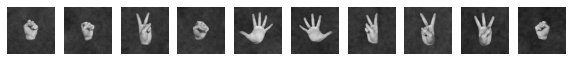

label for each of the above image: ['0L', '0L', '2L', '0L', '5L', '5R', '2R', '2R', '3L', '0R']


In [10]:
# memvisualisasikan 10 sampel pelatihan dengan labelnya.
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [11]:
X_test = []
y_test = []
os.chdir(r"C:\Users\user\Documents\Semester Antaraa\Project\test")
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(128,128))
      X_test.append(img)
      y_test.append(i[-6:-5])

  0%|          | 0/3600 [00:00<?, ?it/s]

#mengubah label menggunakan LabelEncoder 
#dan kemudian mengubahnya menjadi kategorikal yang memiliki beberapa kelas dan mengubahnya menjadi array

In [12]:
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (128, 128, 3)
Shape of an image in X_test:  (128, 128, 3)


In [13]:
print("Total categories: ", len(np.unique(y_train)))
print("Total categories: ", len(np.unique(y_test)))

Total categories:  12
Total categories:  6


In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=12)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=12)

y_train = np.array(y_train)
X_train = np.array(X_train)

y_test = np.array(y_test)
X_test = np.array(X_test)

In [15]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (18000, 128, 128, 3)
X_test Shape:  (3600, 128, 128, 3)
y_train Shape:  (18000, 12)
y_test Shape:  (3600, 12)


# CNN Model

In [16]:
m1=Sequential()
m1.add(BatchNormalization(input_shape = (128,128,3)))
m1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (128, 128, 3))) 
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=6,kernel_size=4,padding='same',activation='relu'))             
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128,kernel_size=3,padding='same',activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128,kernel_size=2,padding='same',activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Flatten()) 
m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))
m1.add(Dense(units = 12, activation = 'softmax'))

In [17]:
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [18]:
#melatih model cnn
model = m1.fit(X_train,y_train,
                    epochs=30, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/30
563/563 [==============================] - 530s 937ms/step - loss: 0.1393 - accuracy: 0.9556 - val_loss: 30.7482 - val_accuracy: 0.0833
Epoch 2/30
563/563 [==============================] - 524s 931ms/step - loss: 2.6593e-05 - accuracy: 1.0000 - val_loss: 34.8748 - val_accuracy: 0.0833
Epoch 3/30
563/563 [==============================] - 529s 940ms/step - loss: 8.9442e-06 - accuracy: 1.0000 - val_loss: 37.3642 - val_accuracy: 0.0833
Epoch 4/30
563/563 [==============================] - 527s 936ms/step - loss: 4.3164e-06 - accuracy: 1.0000 - val_loss: 39.2793 - val_accuracy: 0.0833
Epoch 5/30
563/563 [==============================] - 528s 937ms/step - loss: 2.5469e-06 - accuracy: 1.0000 - val_loss: 40.8927 - val_accuracy: 0.0833
Epoch 6/30
563/563 [==============================] - 524s 931ms/step - loss: 1.4884e-06 - accuracy: 1.0000 - val_loss: 42.4194 - val_accuracy: 0.0833
Epoch 7/30
563/563 [==============================] - 524s 931ms/step - loss: 9.9044e-07 - accurac

In [19]:
loss_and_metrics = m1.evaluate(X_test,y_test)
print(loss_and_metrics)

113/113 [==============================] - 11s 101ms/step - loss: 61.0406 - accuracy: 0.0833
[61.040626525878906, 0.0833333358168602]


melakukan prediksi jumlah jari

In [20]:
predicted_classes = m1.predict(X_train[:,:,:,:])
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes[0]

0

In [21]:
import numpy as np
k=X_train.shape[0]
r=np.random.randint(k)
r


11154

In [22]:
print("Prediction:",predicted_classes[r])
print("\nActuals:   ",y_train[r])

Prediction: 8

Actuals:    [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [23]:
k=X_train.shape[0]
r=np.random.randint(k)
r


16648

In [24]:
print("Prediction:",predicted_classes[r])
print("\nActuals:   ",y_train[r])

Prediction: 3

Actuals:    [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
